In [1]:
import os
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from keras.applications.inception_v3 import InceptionV3
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

2024-04-08 16:34:23.405490: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
# Data preparation
dataset_dir= 'TNB_split'
input_shape=(224, 224, 3)
batch_size=8
num_classes=5

In [3]:
#Data augmentation
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen=ImageDataGenerator(
    rescale=1./255)

In [4]:
#Generate the train dataset, validation dataset and test dataset
train_generator=train_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'train'),
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical', #skin has two classes: benign and malignant
    )

validation_generator=train_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'val'),
    target_size=input_shape[:2],
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical', #skin has two classes: benign and malignant
    )

test_generator=test_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'test'),
    target_size=input_shape[:2],
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical', #skin has two classes: benign and malignant
    )

Found 2562 images belonging to 5 classes.
Found 369 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [5]:
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

2024-04-08 16:34:25.734755: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2024-04-08 16:34:25.770312: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:e3:00.0 name: NVIDIA GeForce RTX 4090 computeCapability: 8.9
coreClock: 2.55GHz coreCount: 128 deviceMemorySize: 23.65GiB deviceMemoryBandwidth: 938.86GiB/s
2024-04-08 16:34:25.770350: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2024-04-08 16:34:25.775441: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-04-08 16:34:25.775534: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2024-04-08 16:34:25.777165: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcu

In [6]:
# Freeze the layers in the pre-trained models
for layer in inception_model.layers:
    layer.trainable = False

In [7]:
# create a new model and add the VGG base model
model = Sequential()
model.add(inception_model)

In [8]:
# Add additional layers for classification
model.add(Flatten())
model.add(Dense(256, activation='relu'))  # first FC layer
model.add(Dense(5, activation='softmax'))  # second FC layer

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               13107456  
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1285      
Total params: 34,911,525
Trainable params: 13,108,741
Non-trainable params: 21,802,784
_________________________________________________________________


In [11]:
history = model.fit(train_generator, epochs=50, validation_data=validation_generator, verbose=1)

2024-04-08 16:34:30.169004: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2024-04-08 16:34:30.169500: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2000000000 Hz


Epoch 1/50


2024-04-08 16:34:51.210634: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2024-04-08 16:34:52.194695: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8101
2024-04-08 16:34:53.107451: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2024-04-08 16:34:53.107465: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at /usr/local/cuda-11.2/bin/ptxas
2024-04-08 16:34:53.107516: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: /usr/local/cuda-11.2/bin/ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-04-08 16:34:53.113989: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
20

  1/321 [..............................] - ETA: 2:06:43 - loss: 2.2403 - accuracy: 0.1250

2024-04-08 16:34:53.956048: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


321/321 [==============================] - 77s 168ms/step - loss: 10.5984 - accuracy: 0.5879 - val_loss: 3.4338 - val_accuracy: 0.6287
Epoch 2/50
321/321 [==============================] - 47s 148ms/step - loss: 1.5569 - accuracy: 0.6755 - val_loss: 1.1447 - val_accuracy: 0.6558
Epoch 3/50
321/321 [==============================] - 48s 148ms/step - loss: 0.7309 - accuracy: 0.7441 - val_loss: 0.8100 - val_accuracy: 0.7182
Epoch 4/50
321/321 [==============================] - 46s 143ms/step - loss: 0.6478 - accuracy: 0.7624 - val_loss: 0.7272 - val_accuracy: 0.7263
Epoch 5/50
321/321 [==============================] - 46s 142ms/step - loss: 0.6557 - accuracy: 0.7595 - val_loss: 0.7242 - val_accuracy: 0.7236
Epoch 6/50
321/321 [==============================] - 46s 143ms/step - loss: 0.5909 - accuracy: 0.7813 - val_loss: 0.6812 - val_accuracy: 0.7398
Epoch 7/50
321/321 [==============================] - 46s 143ms/step - loss: 0.6394 - accuracy: 0.7525 - val_loss: 0.6585 - val_accuracy: 0.

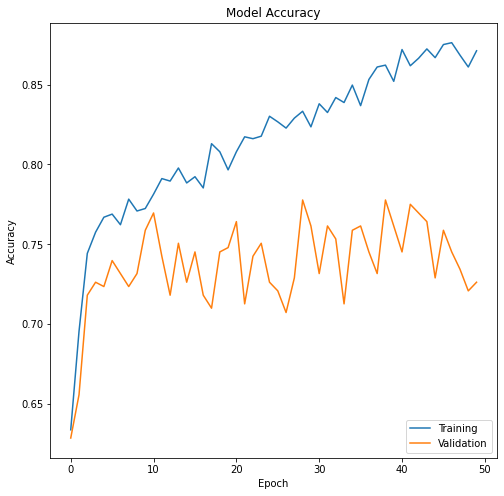

In [12]:
plt.figure(figsize=(8, 8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

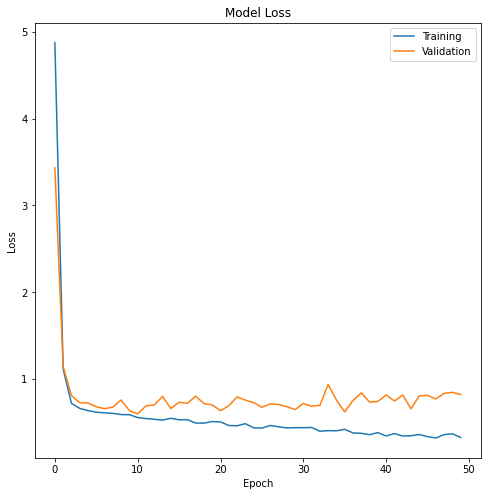

In [13]:
plt.figure(figsize=(8, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [14]:
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

92/92 [==============================] - 5s 51ms/step - loss: 0.8632 - accuracy: 0.7332
Test Loss: 0.8631644248962402
Test Accuracy: 0.7332421541213989


In [15]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, auc

In [16]:
# Get the prediction results of the model
y_pred = model.predict(test_generator)
y_true = test_generator.classes

Confusion Matrix:
[[ 32  17  19   6   0]
 [ 29 117  15  35   3]
 [ 11   1 346   2   1]
 [  6  12   2  36   3]
 [  2  15   0  16   5]]


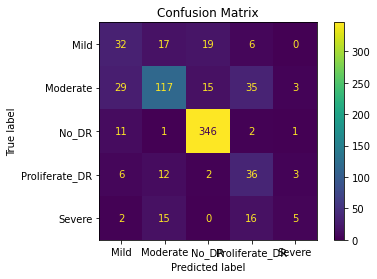

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
# Convert probabilities to categories
y_pred_labels = np.argmax(y_pred, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Compute the confusion matrix
confusion = confusion_matrix(y_true, y_pred_labels)

print("Confusion Matrix:")
print(confusion)

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=class_labels)
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [18]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

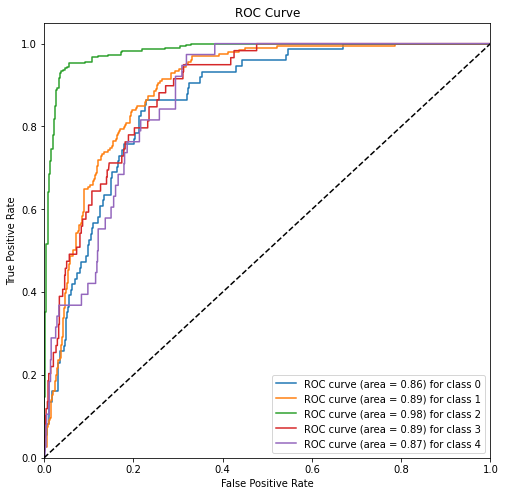

In [19]:
# Plot ROC curve
plt.figure(figsize=(8, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [20]:
# Import necessary libraries
from sklearn.metrics import f1_score

# Assuming y_true and y_pred_labels are defined

# Compute the F1 score (micro)
f1_micro = f1_score(y_true, y_pred_labels, average='micro')
print('F1-score (micro):', f1_micro)

# Compute the F1 score (macro)
f1_macro = f1_score(y_true, y_pred_labels, average='macro')
print('F1-score (macro):', f1_macro)

# Compute the F1 score (weighted)
f1_weighted = f1_score(y_true, y_pred_labels, average='weighted')
print('F1-score (weighted):', f1_weighted)

F1-score (micro): 0.7332421340629275
F1-score (macro): 0.5325351366141307
F1-score (weighted): 0.7266074950364786


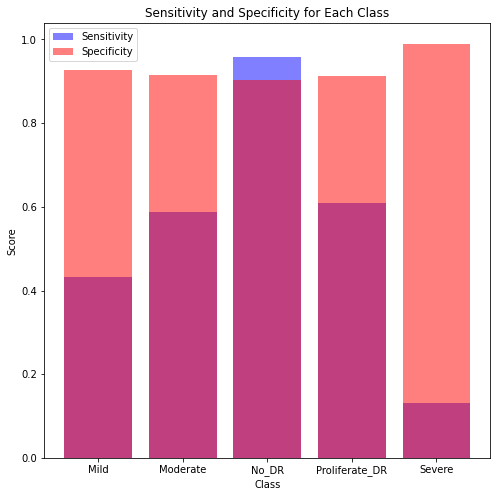

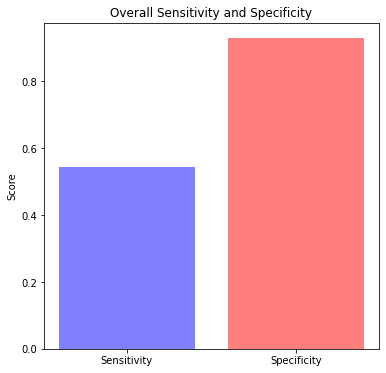

In [21]:
import matplotlib.pyplot as plt

# Initialize variables to store overall sensitivity and specificity
overall_sensitivity = 0
overall_specificity = 0
sensitivity_scores = []
specificity_scores = []

# Loop through each class
for i, class_label in enumerate(class_labels):
    # Extract TP, FP, FN, and TN for the current class
    TP = confusion[i, i]
    FP = sum(confusion[:, i]) - TP
    FN = sum(confusion[i, :]) - TP
    TN = sum(sum(confusion)) - TP - FP - FN
    
    # Compute sensitivity and specificity for the current class
    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
    
    # Accumulate sensitivity and specificity for overall calculation
    overall_sensitivity += sensitivity
    overall_specificity += specificity
    
    # Store sensitivity and specificity for current class
    sensitivity_scores.append(sensitivity)
    specificity_scores.append(specificity)

# Calculate overall sensitivity and specificity
num_classes = len(class_labels)
overall_sensitivity /= num_classes
overall_specificity /= num_classes

# Plotting sensitivity and specificity for each class
plt.figure(figsize=(8, 8))
plt.bar(range(len(class_labels)), sensitivity_scores, color='b', alpha=0.5, label='Sensitivity')
plt.bar(range(len(class_labels)), specificity_scores, color='r', alpha=0.5, label='Specificity')
plt.xticks(range(len(class_labels)), class_labels)
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Sensitivity and Specificity for Each Class')
plt.legend()
plt.show()

# Plotting overall sensitivity and specificity
plt.figure(figsize=(6, 6))
plt.bar(['Sensitivity', 'Specificity'], [overall_sensitivity, overall_specificity], color=['b', 'r'], alpha=0.5)
plt.ylabel('Score')
plt.title('Overall Sensitivity and Specificity')
plt.show()


In [22]:
from keras import backend as K
import gc

In [23]:
K.clear_session()
gc.collect()

16762

In [24]:
del model

In [25]:
# you will need to install numba using "pip install numba"
from numba import cuda

ModuleNotFoundError: No module named 'numba'

In [ ]:
cuda.select_device(0)
cuda.close()